In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [24]:
df  = pd.read_csv('train.csv')



df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [25]:
df['Sex'] = df['Sex'].replace({
    'male' : 0, 
    'female' : 1
})

C:\Users\DELL\AppData\Local\Temp\ipykernel_13432\915503887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({


In [26]:
df = pd.get_dummies(df, columns=['Embarked'])

In [35]:
feature_names = ['Pclass', 'Age', 'Sex', 'Fare', ]
label_name = 'Survived'
X = df[feature_names]
y = df[label_name]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_hat = model.predict(X_test)

print(accuracy_score(y_test, y_hat))

0.7932960893854749


In [46]:
df_test = pd.read_csv('test.csv')
df_test['Sex'] = df_test['Sex'].replace({
    'male' : 0, 
    'female' : 1
})
# df_test.head(2)

X_t = df_test[feature_names]
y_hat = model.predict(X_t)

df_test['Survived'] = y_hat
df_test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_13432\2681425371.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Sex'] = df_test['Sex'].replace({


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0


In [48]:
df_test[['PassengerId', 'Survived']].to_csv(
    'titanic-submission.csv', index=False
)

# Regression

In [61]:
df = pd.read_csv('advertising.csv', index_col=0)

In [62]:
df.head(2)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


Text(0, 0.5, 'Sales')

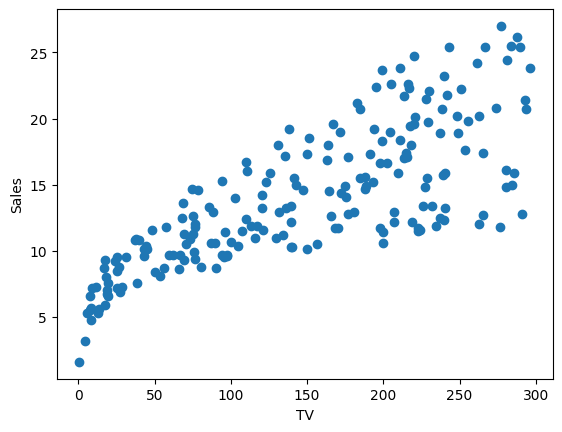

In [63]:
import matplotlib.pyplot as plt

plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

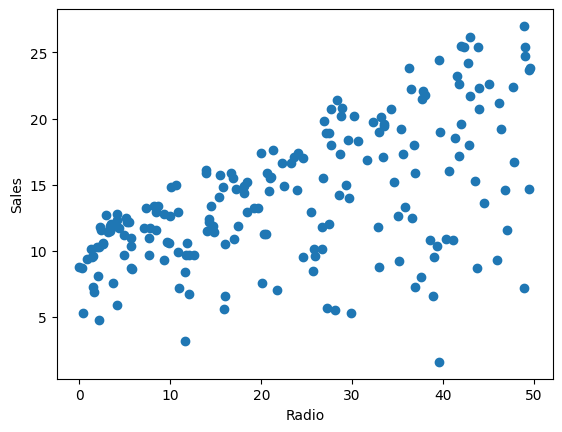

In [64]:
import matplotlib.pyplot as plt

plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')

In [57]:
# !pip install seaborn

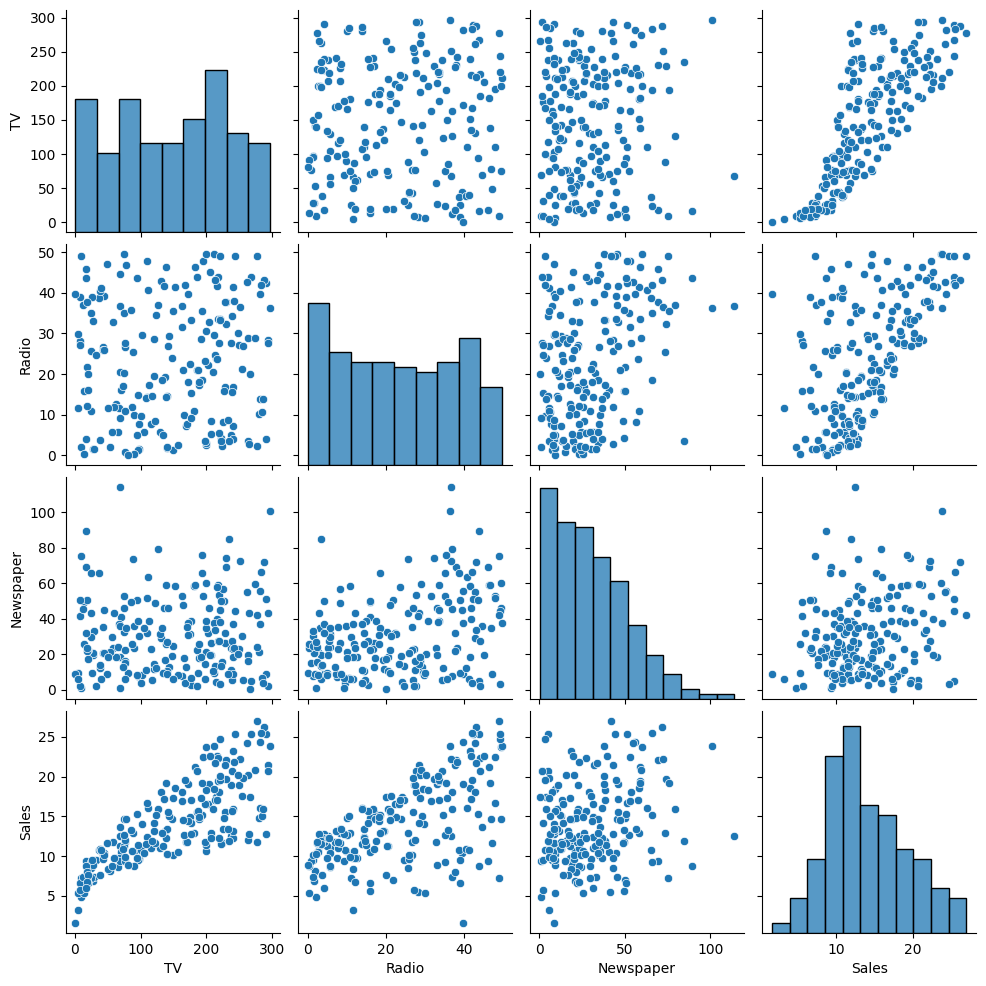

In [65]:
import seaborn as sns 

sns.pairplot(df)

<Axes: >

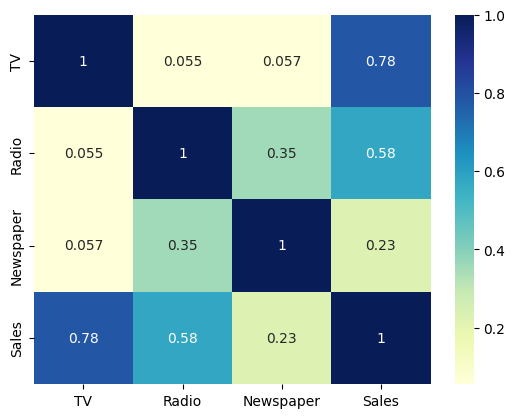

In [69]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [70]:
feature_names = ['TV']
label_name = 'Sales'
X = df[feature_names]
y = df[label_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
# y_test

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [76]:
from sklearn.metrics import root_mean_squared_error
y_hat = model.predict(X_test)

root_mean_squared_error(y_test, y_hat)

3.023664957065303

Text(0, 0.5, 'Sales')

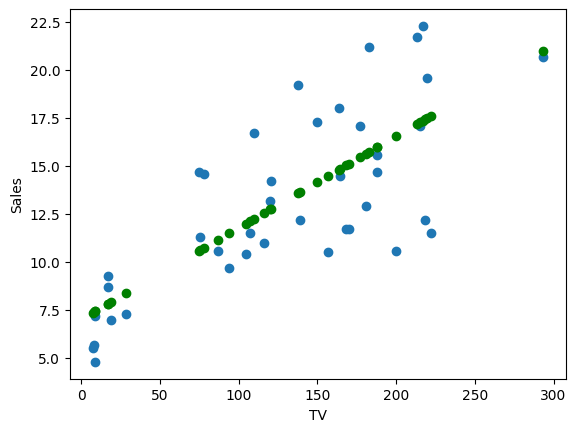

In [80]:
plt.scatter(X_test['TV'], y_test)
plt.scatter(X_test['TV'], y_hat, color='green')
plt.xlabel('TV')
plt.ylabel('Sales')

In [93]:
result_df = pd.DataFrame()
result_df['TV'] = X_test['TV']
result_df['y_ground'] = y_test
result_df['y_hat'] = y_hat
result_df['deviation_percent'] = 100*  abs(y_hat - y_test) / y_test 
result_df.head()

,TV,y_ground,y_hat,deviation_percent
90,109.8,16.7,12.253862,26.623583
80,116.0,11.0,12.549534,14.086677
70,216.8,22.3,17.356603,22.167701
85,213.5,21.7,17.199229,20.740882
38,74.7,14.7,10.579972,28.027403


(array([9., 6., 5., 6., 4., 5., 1., 1., 0., 3.]),
 array([ 1.11016331,  6.60847423, 12.10678515, 17.60509607, 23.10340698,
        28.6017179 , 34.10002882, 39.59833974, 45.09665065, 50.59496157,
        56.09327249]),
 <BarContainer object of 10 artists>)

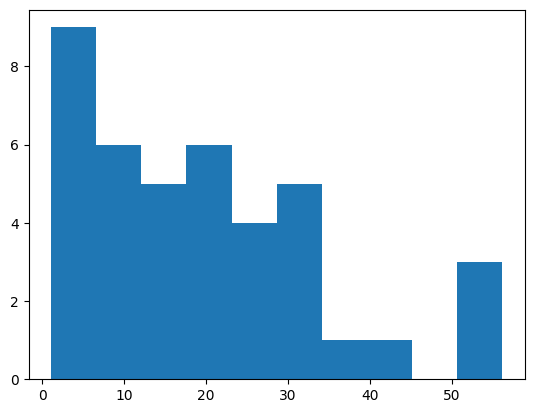

In [98]:
plt.hist(result_df['deviation_percent'], bins = 10)